---
title: Conv2D
categories: deep-learning
date: 2020-10-22
---

本文将详细介绍Conv2d，并比较torch和tensorflow中的定义，然后通过它们实现经典的[LeNet](https://www.jiqizhixin.com/graph/technologies/6c9baf12-1a32-4c53-8217-8c9f69bd011b)。

## [torch.nn.Conv2d](https://pytorch.org/docs/stable/nn.html?highlight=conv2d#torch.nn.Conv2d)

In [1]:
class torch.nn.Conv2d(
  in_channels,  # int，输入通道数
  out_channels, # int，输出通道数
  kernel_size,  # int或Tuple[int, int]，卷积核大小
  stride=1,     # int或Tuple[int, int]，滑动窗口，指每次卷积对原数据滑动stride个单元格
  padding=0,    # int或Tuple[int, int]，两边的空白填充（一般补0）
  dilation=1,   # int或Tuple[int, int]，膨胀系数，一个卷积核内部之间的间隔
  groups=1,     # int，Number of blocked connections from input channels to output channels. 
  bias=True,    # bool，是否启用bias
  padding_mode='zeros'  # str，选择有'zeros', 'reflect', 'replicate' or 'circular'
)

SyntaxError: invalid syntax (<ipython-input-1-48fb7b5c5c0d>, line 1)

- input shape: $(N,C_{in}, H_{in},W_{in})$

  - $N$：batch size。也就是每次训练所使用的样本个数
  - $C_{in}$： 输入channel数量
  - $H_{in}$：输入图片的(像素)高度
  - $W_{in}$： 输入图性的(像素)宽度
  
- output shape: $(N,C_{out}, H_{out},W_{out})$

  - $N$：batch size。也就是每次训练所使用的样本个数
  - $C_{out}$： 输出channel数量
  - $H_{out}$：输出图片的(像素)高度
  - $W_{out}$：输出图片的(像素)宽度
  
  设$$\mathbf {S_{in}} = \begin{bmatrix} H_{in} & W_{in} \end{bmatrix}  $$，$$ \mathbf {S_{out} }= \begin{bmatrix} H_{out} & W_{out} \end{bmatrix}  $$，则
  $$
  \mathbf {S_{out}} = \lfloor \frac {\mathbf { S_{in}} + 2 \times \mathbf {padding}  - \mathbf {dilation} \circ (\mathbf {kernal\_size} -1 ) - 1} { \mathbf {stride}}  + 1 \rfloor
  $$
  上面的公式中，可以这样逐步理解。
  
  - $\mathbf {dilation} \circ (\mathbf {kernal\_size} -1 ) + 1 $： 表示一个卷积核所占的空间
  - ${\mathbf { S_{in}} + 2 \times \mathbf {padding}  - \mathbf {dilation} \circ (\mathbf {kernal\_size} -1 ) - 1}$：表示减去一个卷积核所占空间
  - $\frac {\mathbf { S_{in}} + 2 \times \mathbf {padding}  - \mathbf {dilation} \circ (\mathbf {kernal\_size} -1 ) - 1} { \mathbf {stride}}$ ：表示剩下空间可以容纳几个卷积核
  - $+ 1$：表示把第2步减去的卷积核，再加回来。
  - $\lfloor \cdots \rfloor$：表示向下取整。
  
  > 上面的逻辑同样适用于Conv1d，Conv3d
  
- dilation：膨胀系数，一个卷积核内部之间的间隔，默认为1，其卷积核如下图所示：

![image-20200113103126914](images/image-20200113103126914.png)

​		如果dilation=2，则卷积核如下图所示，计算时忽略白色各自，只有灰色的格子参与。

![image-20200113102809015](images/image-20200113102809015.png)

- 参数个数
    $$
    (H_{kernel\_size} \times W_{kernel\_size} \times C_{in} + 1) *C_{out}
    $$

In [2]:
~~~python
import torch 
import torch.nn as nn

conv2d = torch.nn.Conv2d(
    in_channels=3,
    out_channels=16,
    kernel_size=5
)

for parameters in conv2d.parameters():
    print(parameters.size())

# 上面两行代码等价于下面代码    
#print(conv2d.weights.size())
#print(conv2d.bias.size())
~~~

![image-20201020090817136](images/image-20201020090817136.png)

SyntaxError: invalid syntax (<ipython-input-2-f8145ec86f47>, line 17)

##  [tensorflow.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

tensorflow.keras.layers.Conv2D和torch.nn.Conv2d非常相似，但它集成了更多的功能，比如kernel_initializer，bias_initializer，kernel_regularizer和bias_regularizer等。

In [ ]:
class tf.keras.layers.Conv2D(
    filters, 				# int，输出通道数
    kernel_size, 			# int或Tuple[int, int]，卷积核大小
    strides=(1, 1), 		# int或Tuple[int, int]，滑动窗口，每次卷积对原数据滑动stride个单元格
    padding='valid', 		# "valid"或"same"
    data_format=None,		# channels_last或channels_first。不指定表示是channels_last。
    dilation_rate=(1, 1), 	# int或Tuple[int, int]，膨胀系数，一个卷积核内部之间的间隔
    groups=1, 				# the number of groups in which the input is split along the channel axis
    activation=None, 		# 使用激活函数，默认不使用
    use_bias=True,			# bool，是否使用bias
    kernel_initializer='glorot_uniform', # 卷积核初始化方法
    bias_initializer='zeros',	# 偏差值初始化方法				
    kernel_regularizer=None, 	# 卷积核正则化
    bias_regularizer=None, 		# 偏差正则化
    activity_regularizer=None,	# activation函数的正则化，不太理解      
    kernel_constraint=None, 	# 卷积核的Constraint function，不太理解  
    bias_constraint=None, 		# bias的Constraint function，不太理解   
    **kwargs
)

- input shape

  - 当data_format=channels_last，则shape为$(N, H_{in},W_{in},C_{in})$
  - 当data_format=channels_first，则shape为$(N,C_{in}, H_{in},W_{in})$，和pytorch相同

- output shape

In [ ]:
- 当data_format=channels_last，则格式为 $(N, H_{out},W_{out},C_{out})$
- 当data_format=channels_first，则格式为$(N,C_{out}，H_{out},W_{out})$，和pytorch相同

设$$\mathbf {S_{in}} = \begin{bmatrix} H_{in} & W_{in} \end{bmatrix}  $$，$$ \mathbf {S_{out} }= \begin{bmatrix} H_{out} & W_{out} \end{bmatrix}  $$，则
$$
\mathbf {S_{out}} = 
\begin{equation}  
\left\{  
\begin{array}{lcl}  
\lfloor \frac {\mathbf { S_{in}}  - \mathbf {dilation} \circ (\mathbf {kernal\_size} -1 ) - 1} { \mathbf {stride}}  + 1 \rfloor  &  &  valid \\  
\lfloor \frac {\mathbf { S_{in}} } { \mathbf {stride}}   \rfloor &  &  same  
\end{array}  
\right.
\end{equation}
$$

> 上面的逻辑同样适用于Conv1d，Conv3d

- 参数个数

  $$
  (H_{kernel\_size} \times W_{kernel\_size} \times C_{in} + 1) *C_{out}
  $$

  ~~~python
  import tensorflow as tf
  
  conv2d = tf.keras.layers.Conv2D(
      filters=16, 
      kernel_size=5, 
      input_shape=[28,28,3])
  
  x = tf.ones([10, 28, 28, 3])
  y = conv2d(x)
  print(conv2d.kernel.shape)
  print(conv2d.bias.shape)
  ~~~

  ![image-20201020093743424](images/image-20201020093743424.png)

  从结果上看，参数的个数和pytorch完全相同，但维度的设置不同。

## padding逻辑

前文介绍了pytorch和tensorflow中关于padding逻辑，下面以Conv1D为例（Conv2D逻辑是相同的），展示了其中的细节，首先看tensorflow的padding。

- valid：边缘不填充

- same：边缘用0填充

  和pytorch中不同，tersoflow中边缘的填充更加的自动化。下面以$W_{kernel\_size}$为例。

  - 左边：填充$\lfloor  \frac 1 2 (W_{kernel\_size}-1) \rfloor $个数据
  - 右边：填充$\lfloor  \frac 1 2 W_{kernel\_size} \rfloor $个数据

  总体原则是两边补0，然后实际的数据尽量位于中心位置。当$\mathbf {stride}=1$，如下图所示。

  ![image-20201019164450543](images/image-20201019164450543.png)

  当$\mathbf {stride}=2$，和上面不同在于，扣掉了一些数据。

  ![image-20201019164507736](images/image-20201019164507736.png)

验证代码如下。

In [ ]:
import tensorflow as tf

def conv1d(x, kernel_size=4, strides=2, padding='same'):    
    print('-'*10 + 'kernel_size={}, strides={}, padding={}'.format(kernel_size, strides, padding) + '-'*10)
    y = tf.keras.layers.Conv1D(
        filters=1, 
        kernel_size=kernel_size, 
        strides=strides, 
        padding=padding,
        input_shape=x.shape[1:], 
        kernel_initializer='ones',
        bias_constraint='zeros'
    )(x)
    print(y)
    
input_shape = (1, 9, 1)
x = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9], shape=input_shape, dtype=tf.float32)

print('='*25 + "strides=1" + '='*25)
conv1d(x, kernel_size=5, strides=1, padding='valid')
conv1d(x, kernel_size=5, strides=1, padding='same')
conv1d(x, kernel_size=6, strides=1, padding='valid')
conv1d(x, kernel_size=6, strides=1, padding='same')

print('='*25 + "strides=2" + '='*25)
conv1d(x, kernel_size=5, strides=2, padding='valid')
conv1d(x, kernel_size=5, strides=2, padding='same')
conv1d(x, kernel_size=6, strides=2, padding='valid')
conv1d(x, kernel_size=6, strides=2, padding='same')

![image-20201019163827280](images/image-20201019163827280.png)

![image-20201019163914449](images/image-20201019163914449.png)

对于padding的添加，tensorflow更加的智能，而pytorch交给用户自己来决定。下面是pytorch的逻辑，非常相似。

![image-20201019201811447](images/image-20201019201811447.png)

In [ ]:
import torch 

def conv1d(x, kernel_size=4, stride=2, padding=0):   
    print('-'*10 + 'kernel_size={}, stride={}, padding={}'.format(kernel_size, stride, padding) + '-'*10)
    output = torch.nn.Conv1d(
        in_channels=1,
        out_channels=1,
        kernel_size=kernel_size,
        stride=stride, 
        padding=padding
    )
    output.weight = torch.nn.Parameter(torch.ones(1, 1, kernel_size))
    output.bias = torch.nn.Parameter(torch.zeros(1))
    y = output(x)
    print(y)
    

input_shape = (1, 1, 9)
x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.float)
x = x.view(input_shape)
print('='*25 + "stride=1" + '='*25)
conv1d(x, kernel_size=5, stride=1, padding=0)
conv1d(x, kernel_size=5, stride=1, padding=2)
conv1d(x, kernel_size=6, stride=1, padding=0)
conv1d(x, kernel_size=6, stride=1, padding=3)

print('='*25 + "stride=2" + '='*25)
conv1d(x, kernel_size=5, stride=2, padding=0)
conv1d(x, kernel_size=5, stride=2, padding=2)
conv1d(x, kernel_size=6, stride=2, padding=0)
conv1d(x, kernel_size=6, stride=2, padding=3)

![image-20201019201844500](images/image-20201019201844500.png)

## 实现LeNet

LeNet是Yann LeCun等人提出的卷积神经网络结构，有多个版本，一般LeNet即指LeNet-5。其结果图如下：

![image-20201019113632136](images/image-20201019113632136.png)

### pytorch实现

从上面结构图来看，不算输入层，LeNet共有7层，但有参数的只有5层，所以在pytorch中使用torch.nn定了这5层，而其它两层使用torch.nn.functional来定义。下面是模型代码。

In [40]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets

logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)


class TaskTime:
    def __init__(self, task_name, show_start=False):
        self.show_start = show_start
        self.task_name = task_name
        self.start_time = time.time()

    def elapsed_time(self):
        return time.time()-self.start_time

    def __enter__(self):
        if self.show_start:
            logging.info('start {}'.format(self.task_name))
        return self;

    def __exit__(self, exc_type, exc_value, exc_tb):
        logging.info('finish {} [elapsed time: {:.2f} seconds]'.format(self.task_name, self.elapsed_time()))

        
class LeNet(nn.Module):
    def __init__(self, in_dim=1, n_class=10):
        super(LeNet, self).__init__()    

        self.conv1 = nn.Conv2d(in_dim, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, n_class)        
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
def compute_accuarcy(net, loader, criterion, use_cuda=False):
    num_correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            _, _, _, _, correct, _ = forward_(net, inputs, labels, criterion, use_cuda) 
            total += labels.size(0)
            num_correct += correct
    return num_correct/total

def forward_(net, inputs, labels, criterion, use_cuda=False):   
    if use_cuda and  torch.cuda.is_available(): 
        net = net.cuda()
        criterion = criterion.cuda()
        inputs = inputs.cuda()
        labels = labels.cuda()
    outputs = net(inputs)
    loss = criterion(outputs, labels)    
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    accuracy = correct/labels.size(0) 
    return inputs, labels, outputs, loss, correct, accuracy     
    
def train(net, criterion, trainloader, optimizer, testloader=None, epoches=2, use_cuda=False):        
    for epoch in range(epoches):  # loop over the dataset multiple times
        running_loss = 0.0
        num_correct = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data   
            # 正向传播
            _, _, _, loss, correct, _ = forward_(net, inputs, labels, criterion, use_cuda)   
            running_loss += loss
            num_correct += correct

            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 500 == 499:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f, accuracy: %.1f' %
                      (epoch + 1, i + 1, running_loss / 500, 100*num_correct/labels.size(0)/500))
                running_loss = 0.0
                num_correct = 0

下面是创建模型和数据加载的代码。

--------------------------------------------------
创建模型
LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
--------------------------------------------------
显示参数
10
torch.Size([6, 3, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])
--------------------------------------------------
获取数据
Files already downloaded and verified
Files already downloaded and verified
--------------------------------------------------
显示图片示例
torch.Size([32, 3, 32, 32])


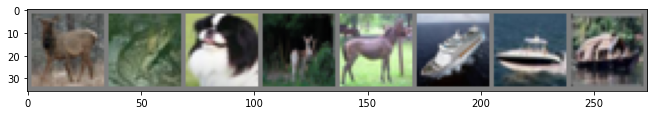

 deer  frog   dog  deer horse  ship  ship  ship


In [27]:
print("-"*50 + "\n创建模型")    
net = LeNet(in_dim=3, n_class=10)
print(net)

print("-"*50 + "\n显示参数")
# 由于存在bias，所以每一层都有两个参数张量，共有10个参数张量。
params = list(net.parameters())
print(len(params))
for param in params:
    print(param.size())                
                
print("-"*50 + "\n获取数据")
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
data_path = os.path.join(os.path.expanduser('~'), '.pytorch/datasets') 
if not os.path.exists(data_path): os.makedirs(data_path)
trainset = torchvision.datasets.CIFAR10(root=os.path.join(data_path, 'cifar10'), train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=os.path.join(data_path, 'cifar10'), train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

print("-"*50 + "\n显示图片示例")
plt.rcParams['figure.figsize'] = (12.0, 1.5) 
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())

# show images
imshow(torchvision.utils.make_grid(images[0:8]))
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

![image-20201022231155489](images/image-20201022231155489.png)

下面是模型训练，保存加载，以及模型评估的代码。

In [28]:
print("-"*50 + "\n训练模型")
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# Adam优化的速度比SGD明显要快
optimizer = optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

with TaskTime('training', True):
    train(net, criterion, trainloader, optimizer=optimizer, epoches=10, use_cuda=True)
    
print("-"*50 + "\n保存，加载模型") 
model_root_path = os.path.join(os.path.expanduser('~'), '.pytorch/model') 
if not os.path.exists(model_root_path): os.makedirs(model_root_path)
model_path = os.path.join(model_root_path, 'torch_lenet.pth')
torch.save(net.state_dict(), model_path) 
net = LeNet(in_dim=3, n_class=10)
net.load_state_dict(torch.load(model_path))     
    
print("-"*50 + "\n评估模型")    
train_accuracy = compute_accuarcy(net, trainloader, criterion, use_cuda=True)   
test_accuracy = compute_accuarcy(net, testloader, criterion, use_cuda=True)
print('Train Accuracy: {:0.1f}%, Test Accuracy: {:0.1f}%'.format(100 * train_accuracy, 100*test_accuracy)) 

2020-10-23 06:44:15,486: INFO: start training


--------------------------------------------------
训练模型
[1,   500] loss: 3.623, accuracy: 32.8
[1,  1000] loss: 3.065, accuracy: 43.9
[1,  1500] loss: 2.855, accuracy: 47.8
[2,   500] loss: 2.642, accuracy: 52.1
[2,  1000] loss: 2.540, accuracy: 54.8
[2,  1500] loss: 2.470, accuracy: 56.1
[3,   500] loss: 2.342, accuracy: 58.2
[3,  1000] loss: 2.282, accuracy: 59.8
[3,  1500] loss: 2.272, accuracy: 59.7
[4,   500] loss: 2.139, accuracy: 62.4
[4,  1000] loss: 2.117, accuracy: 62.5
[4,  1500] loss: 2.121, accuracy: 62.0
[5,   500] loss: 2.002, accuracy: 64.7
[5,  1000] loss: 2.021, accuracy: 63.9
[5,  1500] loss: 1.975, accuracy: 65.0
[6,   500] loss: 1.894, accuracy: 66.6
[6,  1000] loss: 1.938, accuracy: 65.9
[6,  1500] loss: 1.914, accuracy: 66.1
[7,   500] loss: 1.806, accuracy: 67.7
[7,  1000] loss: 1.833, accuracy: 67.5
[7,  1500] loss: 1.846, accuracy: 67.6
[8,   500] loss: 1.717, accuracy: 69.8
[8,  1000] loss: 1.758, accuracy: 69.2
[8,  1500] loss: 1.789, accuracy: 68.7
[9,   50

2020-10-23 06:46:02,103: INFO: finish training [elapsed time: 106.62 seconds]


--------------------------------------------------
保存，加载模型
--------------------------------------------------
评估模型
Train Accuracy: 73.1%, Test Accuracy: 63.8%


![image-20201022234015162](images/image-20201022234015162.png)

准确率只有64%，而且存在过拟合。现在对模型做一些修改，看看效果任何。

### tensorflow实现

首先是模型代码。

In [31]:
import logging
import os
import tensorflow as tf
import time
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')
logging.root.setLevel(level=logging.INFO)

# 设置GPU内存使用上限
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
)

class TaskTime:
    def __init__(self, task_name, show_start=False):
        self.show_start = show_start
        self.task_name = task_name
        self.start_time = time.time()

    def elapsed_time(self):
        return time.time()-self.start_time

    def __enter__(self):
        if self.show_start:
            logging.info('start {}'.format(self.task_name))
        return self;

    def __exit__(self, exc_type, exc_value, exc_tb):
        logging.info('finish {} [elapsed time: {:.2f} seconds]'.format(self.task_name, self.elapsed_time()))

def lenet(in_dim=1, n_class=10):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, in_dim)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(n_class))    
    return model

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


然后创建模型并加载数据。

--------------------------------------------------
创建模型
--------------------------------------------------
显示参数
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
________

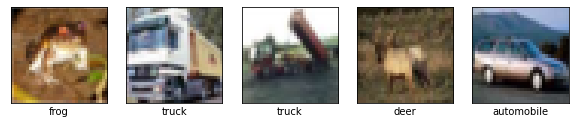

In [34]:
print("-"*50 + "\n创建模型") 
model = lenet(in_dim=3, n_class=10)

print("-"*50 + "\n显示参数")
model.summary()

print("-"*50 + "\n获取数据")
# 默认的保存路径是~/.keras/datasets/
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape, train_labels.shape, train_images.shape, test_labels.shape)
print(type(train_images), type(train_labels.shape))

print("-"*50 + "\n显示图片示例")
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

![image-20201023122302448](images/image-20201023122302448.png)

下面是模型训练，保存加载，以及模型评估的代码。

2020-10-23 06:52:06,119: INFO: start training


--------------------------------------------------
训练模型
Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5950 - accuracy: 0.4158 - val_loss: 1.4474 - val_accuracy: 0.4778
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3041 - accuracy: 0.5350 - val_loss: 1.2185 - val_accuracy: 0.5652
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1952 - accuracy: 0.5768 - val_loss: 1.1638 - val_accuracy: 0.5870
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1128 - accuracy: 0.6045 - val_loss: 1.2049 - val_accuracy: 0.5729
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0504 - accuracy: 0.6268 - val_loss: 1.1186 - val_accuracy: 0.5998
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0061 - accuracy: 0.6443 - val_loss: 1.1128 - val_accuracy: 0.6054
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.96

2020-10-23 06:53:01,788: INFO: finish training [elapsed time: 55.67 seconds]


--------------------------------------------------
保存，加载模型
--------------------------------------------------
评估模型
1563/1563 - 3s - loss: 0.7888 - accuracy: 0.7207
313/313 - 1s - loss: 1.0937 - accuracy: 0.6225
Train Accuracy: 72.1%, Test Accuracy: 62.3%


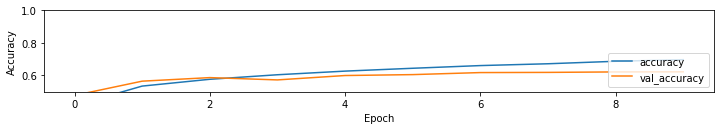

In [35]:
print("-"*50 + "\n训练模型")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
with TaskTime('training', True):
    history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                        validation_data=(test_images, test_labels))

print("-"*50 + "\n保存，加载模型") 
model_root_path = os.path.join(os.path.expanduser('~'), '.keras/model') 
if not os.path.exists(model_root_path): os.makedirs(model_root_path)
model_path = os.path.join(model_root_path, 'tf_lenet.h5')
model.save(model_path) 
model = tf.keras.models.load_model(model_path)  
    
print("-"*50 + "\n评估模型")    
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Train Accuracy: {:0.1f}%, Test Accuracy: {:0.1f}%'.format(100 * train_acc, 100*test_acc)) 

In [44]:
class LeNet1(nn.Module):
    def __init__(self, in_dim=1, n_class=10):
        super(LeNet1, self).__init__()    

        self.conv1 = nn.Conv2d(in_dim, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64 * 4 * 4, 64)  
        self.fc2 = nn.Linear(64, n_class)        
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.relu(self.conv3(x))
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

print("-"*50 + "\n创建模型")    
net = LeNet1(in_dim=3, n_class=10)
print(net)

print("-"*50 + "\n显示参数")
# 由于存在bias，所以每一层都有两个参数张量，共有10个参数张量。
params = list(net.parameters())
print(len(params))
for param in params:
    print(param.size())
    
   

--------------------------------------------------
创建模型
LeNet1(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)
--------------------------------------------------
显示参数
10
torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([64, 1024])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [45]:
print("-"*50 + "\n训练模型")
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# Adam优化的速度比SGD明显要快
optimizer = optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

with TaskTime('training', True):
    train(net, criterion, trainloader, optimizer=optimizer, epoches=10, use_cuda=True)  
    
print("-"*50 + "\n评估模型")    
train_accuracy = compute_accuarcy(net, trainloader, criterion, use_cuda=True)   
test_accuracy = compute_accuarcy(net, testloader, criterion, use_cuda=True)
print('Train Accuracy: {:0.1f}%, Test Accuracy: {:0.1f}%'.format(100 * train_accuracy, 100*test_accuracy))  

2020-10-23 07:18:58,540: INFO: start training


--------------------------------------------------
训练模型
[1,   500] loss: 3.507, accuracy: 35.2
[1,  1000] loss: 2.843, accuracy: 48.4
[1,  1500] loss: 2.602, accuracy: 52.4
[2,   500] loss: 2.335, accuracy: 58.1
[2,  1000] loss: 2.188, accuracy: 60.9
[2,  1500] loss: 2.133, accuracy: 61.9
[3,   500] loss: 1.935, accuracy: 65.3
[3,  1000] loss: 1.908, accuracy: 66.2
[3,  1500] loss: 1.837, accuracy: 67.3
[4,   500] loss: 1.715, accuracy: 69.9
[4,  1000] loss: 1.695, accuracy: 70.1
[4,  1500] loss: 1.708, accuracy: 69.8
[5,   500] loss: 1.563, accuracy: 72.8
[5,  1000] loss: 1.577, accuracy: 72.5
[5,  1500] loss: 1.547, accuracy: 72.8
[6,   500] loss: 1.427, accuracy: 74.4
[6,  1000] loss: 1.454, accuracy: 74.3
[6,  1500] loss: 1.479, accuracy: 74.2
[7,   500] loss: 1.340, accuracy: 76.9
[7,  1000] loss: 1.371, accuracy: 76.0
[7,  1500] loss: 1.377, accuracy: 76.1
[8,   500] loss: 1.240, accuracy: 78.2
[8,  1000] loss: 1.294, accuracy: 76.9
[8,  1500] loss: 1.301, accuracy: 76.9
[9,   50

2020-10-23 07:20:50,098: INFO: finish training [elapsed time: 111.56 seconds]


--------------------------------------------------
评估模型
Train Accuracy: 82.7%, Test Accuracy: 73.1%


In [46]:
def lenet1(in_dim=1, n_class=10):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, in_dim)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(n_class))    
    return model

print("-"*50 + "\n创建模型") 
model = lenet1(in_dim=3, n_class=10)

print("-"*50 + "\n显示参数")
model.summary()

--------------------------------------------------
创建模型
--------------------------------------------------
显示参数
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
________

2020-10-23 07:30:16,191: INFO: start training


--------------------------------------------------
训练模型
Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5434 - accuracy: 0.4352 - val_loss: 1.2422 - val_accuracy: 0.5551
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1774 - accuracy: 0.5838 - val_loss: 1.0957 - val_accuracy: 0.6119
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0228 - accuracy: 0.6408 - val_loss: 1.0461 - val_accuracy: 0.6333
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9273 - accuracy: 0.6735 - val_loss: 0.9523 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8552 - accuracy: 0.7018 - val_loss: 0.9089 - val_accuracy: 0.6875
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8034 - accuracy: 0.7172 - val_loss: 0.8939 - val_accuracy: 0.6920
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.75

2020-10-23 07:31:15,754: INFO: finish training [elapsed time: 59.56 seconds]


--------------------------------------------------
评估模型
1563/1563 - 3s - loss: 0.5654 - accuracy: 0.8017
313/313 - 1s - loss: 0.8914 - accuracy: 0.7086
Train Accuracy: 80.2%, Test Accuracy: 70.9%


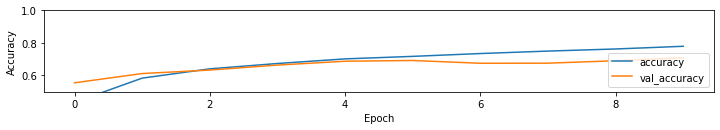

In [47]:
print("-"*50 + "\n训练模型")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
with TaskTime('training', True):
    history = model.fit(train_images, train_labels, epochs=10, batch_size=32,
                        validation_data=(test_images, test_labels))

    
print("-"*50 + "\n评估模型")    
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Train Accuracy: {:0.1f}%, Test Accuracy: {:0.1f}%'.format(100 * train_acc, 100*test_acc))

![image-20201023130910175](images/image-20201023130910175.png)

![image-20201023130925884](images/image-20201023130925884.png)

## 参考

- [TF Tutorial - Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)
- [Torch Tutorial - TRAINING A CLASSIFIER](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)